In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Load data
df = pd.read_csv("E:\Courses\Data Analysis\Projects\Project 1 - Sales Data Analysis\Project 1 - Sales Data Analysis\Sales Data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
for col in ['Quantity Ordered', 'Price Each', 'Sales', 'Hour', 'Month']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df_clean = df.dropna(subset=['Order Date', 'Product', 'Quantity Ordered', 'Sales'])

df_clean.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


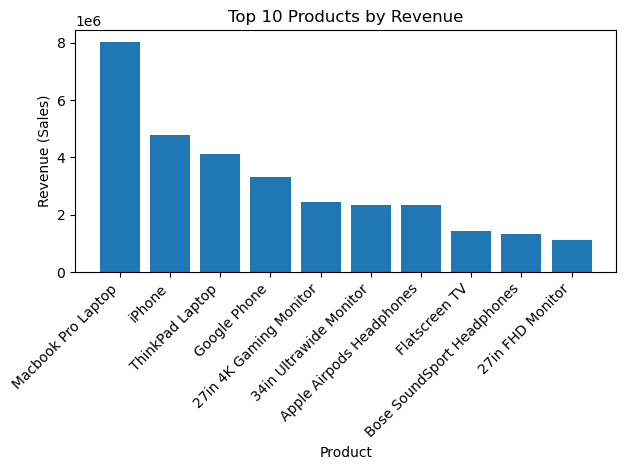

In [24]:
top_revenue = (df_clean.groupby('Product', as_index=False)['Sales']
               .sum().sort_values('Sales', ascending=False).head(10))

plt.figure()
plt.bar(top_revenue['Product'], top_revenue['Sales'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue (Sales)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  Sales by City

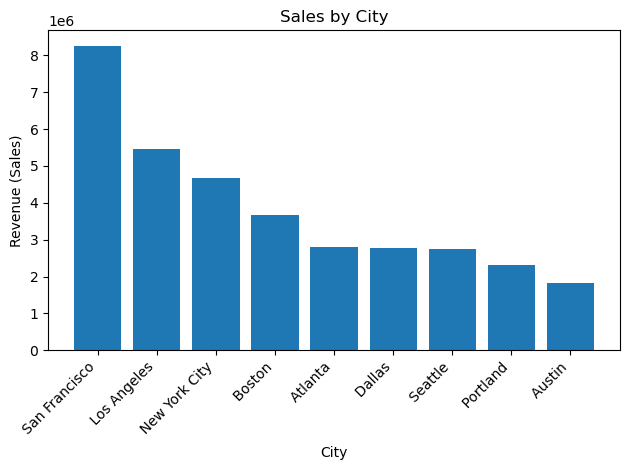

In [26]:
city_sales = (df_clean.groupby('City', as_index=False)['Sales']
              .sum().sort_values('Sales', ascending=False))

plt.figure()
plt.bar(city_sales['City'], city_sales['Sales'])
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Revenue (Sales)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Orders by Hour

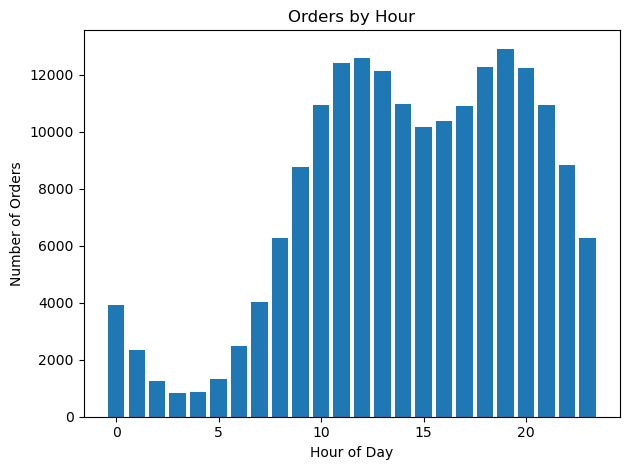

In [28]:
orders_by_hour = (df_clean.groupby(df_clean['Order Date'].dt.hour)['Order ID']
                  .count().rename('Orders').reset_index().rename(columns={'index':'Hour'}))
orders_by_hour = orders_by_hour.rename(columns={'Order Date':'Hour'})
orders_by_hour['Hour'] = orders_by_hour['Hour']

plt.figure()
plt.bar(orders_by_hour['Hour'], orders_by_hour['Orders'])
plt.title('Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [33]:
import os
visuals_dir = '../visuals'
os.makedirs(visuals_dir, exist_ok=True)

def save_line_chart(x, y, title, xlabel, ylabel, path):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()

def save_bar_chart(labels, values, title, xlabel, ylabel, path, rotate_xticks=False):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotate_xticks:
        import matplotlib.pyplot as plt
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(path)
    plt.close()

save_line_chart(monthly_sales['YearMonth'], monthly_sales['Sales'], 'Monthly Sales','Month','Sales', os.path.join(visuals_dir,'monthly_sales.png'))
save_bar_chart(top_qty['Product'], top_qty['Quantity Ordered'],'Top 10 Products by Quantity','Product','Quantity Ordered', os.path.join(visuals_dir,'top_products_by_quantity.png'), rotate_xticks=True)
save_bar_chart(top_revenue['Product'], top_revenue['Sales'],'Top 10 Products by Revenue','Product','Revenue (Sales)', os.path.join(visuals_dir,'top_products_by_revenue.png'), rotate_xticks=True)
save_bar_chart(city_sales['City'], city_sales['Sales'],'Sales by City','City','Revenue (Sales)', os.path.join(visuals_dir,'sales_by_city.png'), rotate_xticks=True)
save_bar_chart(orders_by_hour['Hour'], orders_by_hour['Orders'],'Orders by Hour','Hour of Day','Number of Orders', os.path.join(visuals_dir,'orders_by_hour.png'))


PermissionError: [WinError 5] Access is denied: '../visuals'